# Part A – Data Preprocessing and EDA

Dwinda Audia Irnaonefa - 0706022310047

Tiffany Christabel Anggriawan - 0706022310041

In [37]:
# Import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [38]:
# Load and inspect the dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [39]:
# Get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [40]:
# Get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [41]:
# Check missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [42]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

In [43]:
# Handle Missing or Irrelevant Features

# Drop 'duration' to prevent data leakage.
# The duration of the last contact is only known after the call occurs,
# making it unrealistic for use in predicting future campaign outcomes.

# Drop 'day' because it has very low predictive power.
# The specific day of the month when the contact was made does not
# meaningfully affect a customer's likelihood to subscribe.

df = df.drop(columns=['duration', 'day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
 14  y          4521 non-null   object
dtypes: int64(5), object(10)
memory usage: 529.9+ KB


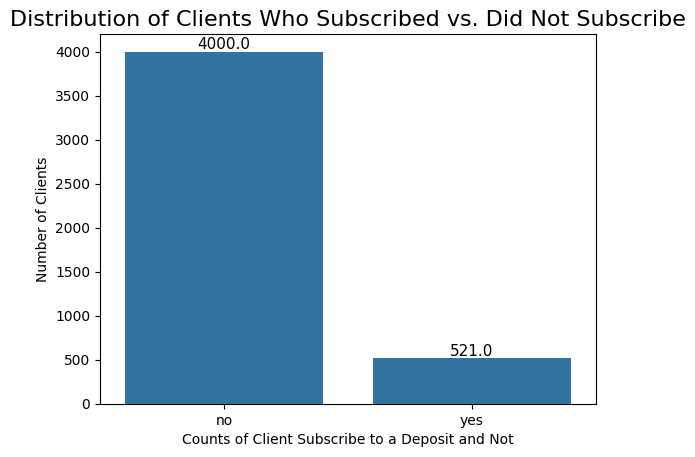

In [44]:
# Perform 3 insightful visualizations with interpretation
#Barchart distribution of clients who subscribed VS not subscribed

ax1 = sns.countplot(x='y', data=df, order=['no', 'yes'])
plt.title('Distribution of Clients Who Subscribed vs. Did Not Subscribe', fontsize=16)
plt.xlabel('Counts of Client Subscribe to a Deposit and Not', fontsize=10)
plt.ylabel('Number of Clients', fontsize=10)
# Add annotations showing the counts above each bar
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()


This plot shows the distribution of clients who subscribed ('yes') vs. those who did not ('no').
It clearly shows a class imbalance, where the number of clients
who did not subscribe is much higher than those who did. This is important to consider when evaluating the model, since accuracy alone is not enough.

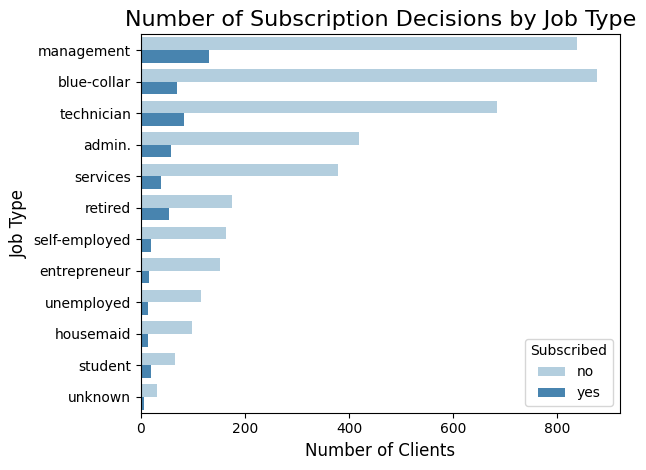

In [45]:
# number of subscription decisions by job type

ax2 = sns.countplot(y='job', data=df, hue='y', palette='Blues', order=df['job'].value_counts().index)
plt.title('Number of Subscription Decisions by Job Type', fontsize=16)
plt.xlabel('Number of Clients', fontsize=12)
plt.ylabel('Job Type', fontsize=12)
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()


This plot compares the subscription decisions across different job categories. We can see that clients with certain occupations, such as 'management', 'technician', and 'blue-collar', represent the largest groups contacted. However, the conversion rate (the proportion of 'yes') may vary. Clients with occupations like 'student' and 'retired' appear to have a higher subscription rate proportionally.

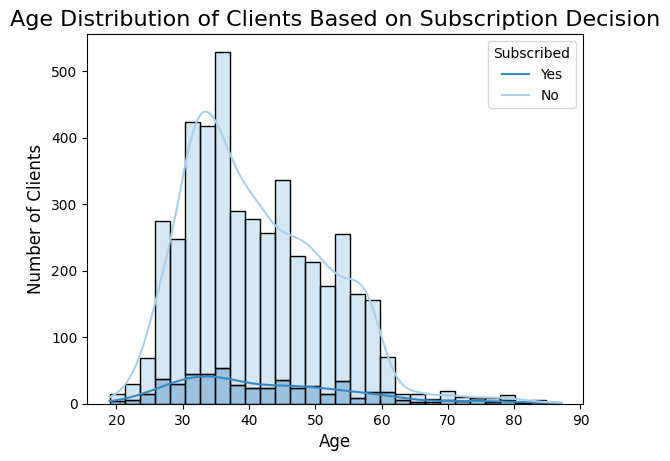

In [46]:
# age distribution of clients based on subscription decision

sns.histplot(data=df, x='age', hue='y', multiple='stack', kde=True, bins=30, palette='Blues')
plt.title('Age Distribution of Clients Based on Subscription Decision', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Subscribed', labels=['Yes', 'No'])
plt.show()


This plot shows the age distribution of clients, separated between those who subscribed and those who did not. The distributions of both groups mostly overlap, with a peak around the ages of 30–40 years old. However, there is an interesting smaller peak among clients aged around 60 and above, indicating that this older age group may be more receptive to deposit offers.

Most of the variables in the dataset show weak correlations with each other, as most values are close to 0.
This suggests that the features are relatively independent, which is beneficial for machine learning models since it reduces redundancy between predictors.

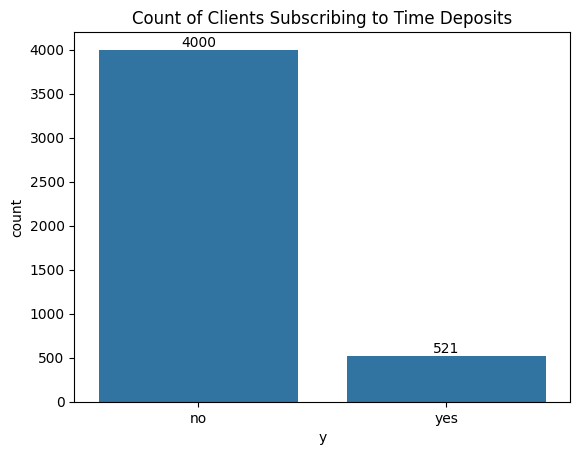

In [47]:
# show how many attrition
ax = sns.countplot(data=df, x='y')
plt.title('Count of Clients Subscribing to Time Deposits')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Feature Encoding

In [48]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import pprint

df_encoded = df.copy()

# Binary Encoding (manual mapping for Yes/No)
# column: default, housing, loan, dan variabel target y
binary_map = {'no': 0, 'yes': 1}
binary_cols = ['default', 'housing', 'loan', 'y']

for col in binary_cols:
    df_encoded[col] = df_encoded[col].map(binary_map)

# Ordinal Encoding
# column: education
# We define the order manually: unknown < primary < secondary < tertiary
education_map = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df_encoded['education'] = df_encoded['education'].map(education_map)

# Nominal Encoding (Using OrdinalEncoder for the remaining categorical columns)
# this converts each unique category to an integer.
# columns: job, marital, contact, month, outcome
nominal_cols = ['job', 'marital', 'contact', 'month', 'poutcome']

existing_nominal_cols = [col for col in nominal_cols if col in df_encoded.columns]

if existing_nominal_cols:
    encoder = OrdinalEncoder()
    df_encoded[existing_nominal_cols] = encoder.fit_transform(df_encoded[existing_nominal_cols])

    # Build dictionary mapping to see encoded results
    encode_dict = {}
    for col, cats in zip(existing_nominal_cols, encoder.categories_):
        encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

    # Showing dictionary mapping
    print("--- Encoder Mapping untuk Kolom Nominal ---")
    pprint.pprint(encode_dict)
else:
    print("Tidak ada kolom nominal yang ditemukan untuk di-encode.")

# Display a sample from the encoded DataFrame
df_encoded.sample(n=5)



--- Encoder Mapping untuk Kolom Nominal ---
{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,y
3764,31,10.0,1.0,2,0,24,1,0,0.0,9.0,1,-1,0,3.0,0
2462,30,7.0,1.0,3,0,1380,1,0,2.0,8.0,2,-1,0,3.0,0
2897,40,1.0,1.0,2,0,326,1,1,0.0,5.0,1,-1,0,3.0,0
3177,32,4.0,2.0,3,0,11797,1,0,0.0,1.0,2,-1,0,3.0,0
2580,36,7.0,1.0,2,0,42,1,0,2.0,8.0,4,-1,0,3.0,0


In [49]:
# checking encode result
df_encoded.loc[470]

,470
age,40.0
job,4.0
marital,1.0
education,3.0
default,0.0
balance,8969.0
housing,1.0
loan,0.0
contact,0.0
month,9.0


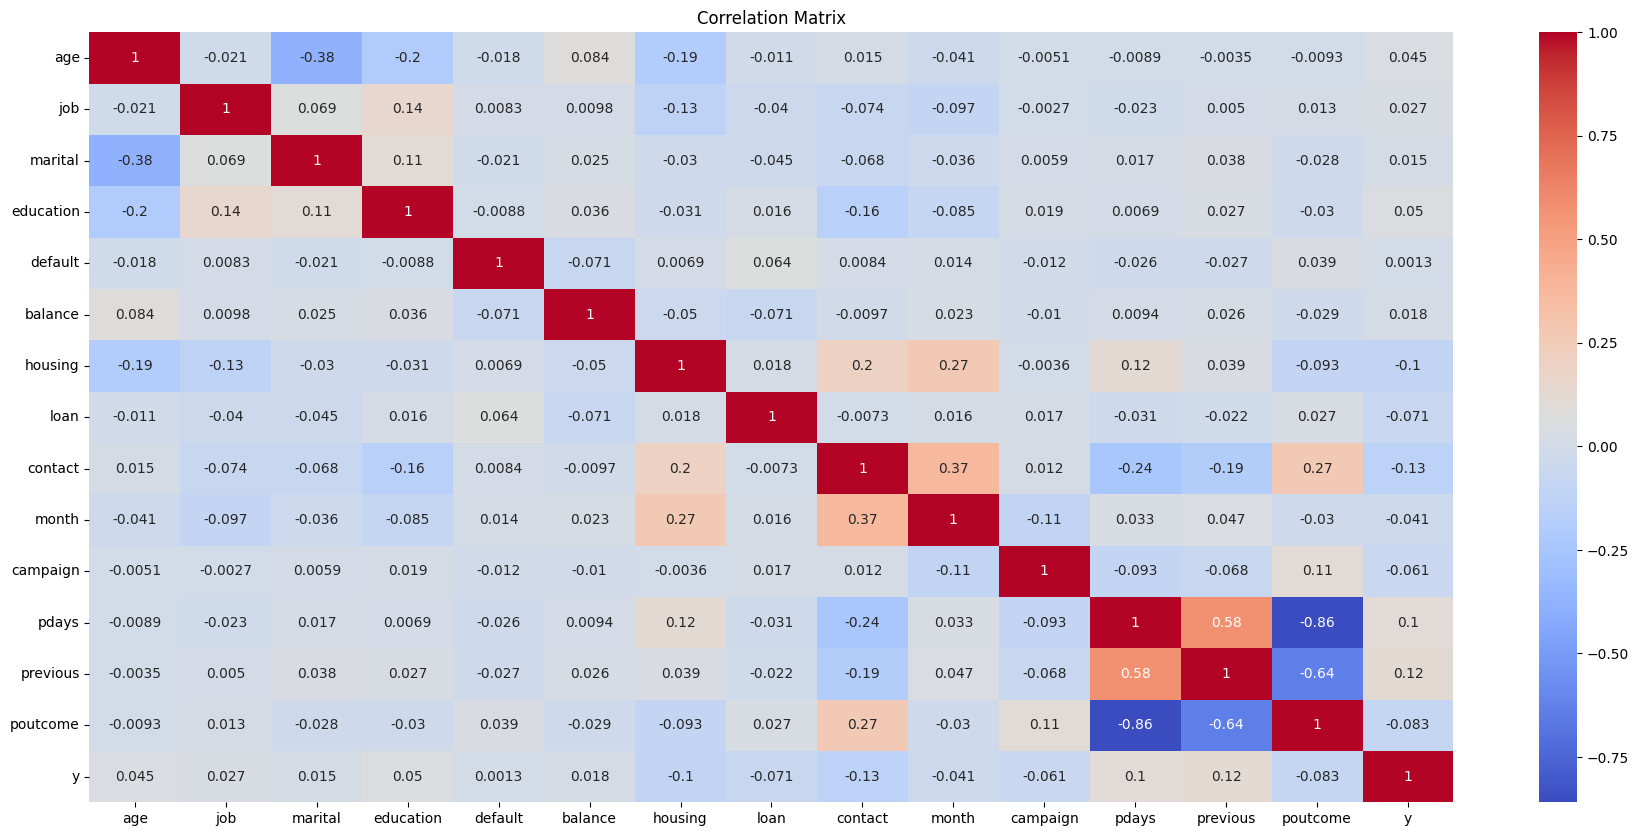

In [50]:
# show heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Separate features and target
Define the features (X) and the target variable (y)

In [51]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [52]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome
0,30,10.0,1.0,1,0,1787,0,0,0.0,10.0,1,-1,0,3.0
1,33,7.0,1.0,2,0,4789,1,1,0.0,8.0,1,339,4,0.0
2,35,4.0,2.0,3,0,1350,1,0,0.0,0.0,1,330,1,0.0
3,30,4.0,1.0,3,0,1476,1,1,2.0,6.0,4,-1,0,3.0
4,59,1.0,1.0,2,0,0,1,0,2.0,8.0,1,-1,0,3.0


In [53]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


# Split Data

Split the encoded data into training and testing sets

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 14), (1357, 14))

In [56]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome
565,40,9.0,1.0,2,0,56,1,1,0.0,4.0,1,247,1,0.0
3480,47,7.0,1.0,2,0,440,1,0,2.0,6.0,1,-1,0,3.0
2125,52,9.0,1.0,2,0,3554,0,1,0.0,5.0,1,-1,0,3.0
3452,31,0.0,1.0,2,0,0,1,0,0.0,5.0,5,-1,0,3.0
1667,33,1.0,1.0,2,0,-346,1,1,2.0,8.0,3,-1,0,3.0


In [57]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,1,0,378,1,0,2.0,8.0,3,-1,0,3.0
72,31,4.0,2.0,3,0,6248,1,0,2.0,8.0,2,-1,0,3.0
1065,30,10.0,1.0,3,0,0,1,0,0.0,9.0,1,-1,0,3.0
3185,42,0.0,1.0,2,0,529,1,1,0.0,9.0,3,-1,0,3.0
130,41,1.0,1.0,1,0,168,1,0,0.0,9.0,3,-1,0,3.0


# Part B – Model Development

# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Handling Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
print(f"Class distribution after SMOTE:\n{y.value_counts()}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Train the Decision Tree Model
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)

# Make Predictions (Training & Test Set)
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Classification Reports
print("\nDecision Tree\n")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

# Evaluate the Model (on Test Set)
print("\nDecision Tree Evaluation Results (Test Set)")
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

Class distribution after SMOTE:
y
0    4000
1    4000
Name: count, dtype: int64

Decision Tree


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1192
           1       0.88      0.89      0.88      1208

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400


Decision Tree Evaluation Results (Test Set)
Accuracy: 0.8804
Precision: 0.8753
Recall: 0.8891
F1-Score: 0.8821



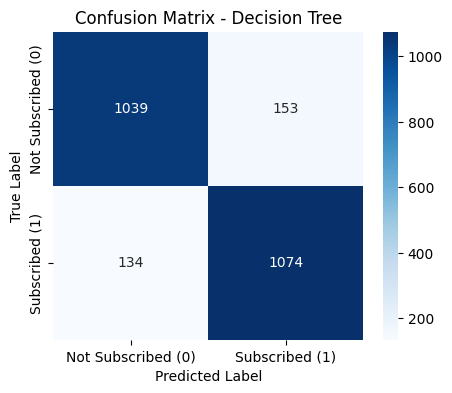

In [59]:
# Display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Subscribed (0)', 'Subscribed (1)'],
            yticklabels=['Not Subscribed (0)', 'Subscribed (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

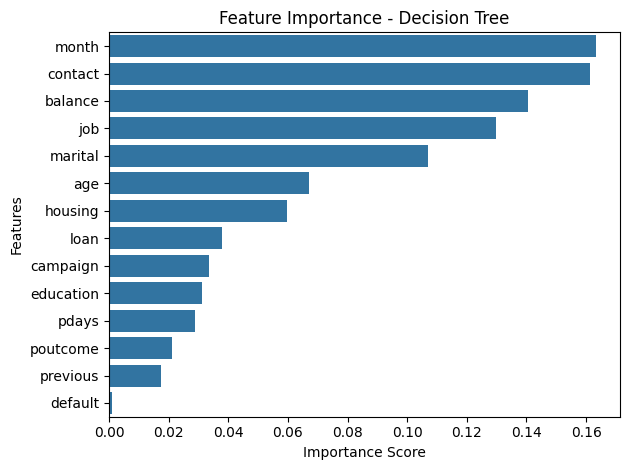

In [60]:
# Feature Importance Decision Tree
feature_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# Decision Tree using Hyperparameter Tuning GridSearchCV

In [61]:
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid
param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_dt = GridSearchCV(dt, param_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best Decision Tree params:", grid_dt.best_params_)
print("Best Decision Tree score:", grid_dt.best_score_)

Best Decision Tree params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree score: 0.8716071428571428


In [62]:
# Appliying best parameter from GridSearchCV to Decision Tree Model
best_params = grid_dt.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report

print("\nDecision Tree using Hyperparameter Tuning GridSearchCV\n")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

# Evaluate the Model (on Test Set) using GridSearchCV
print("\nEvaluation Results (Test Set)")
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")


Decision Tree using Hyperparameter Tuning GridSearchCV


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2808
           1       0.99      0.96      0.98      2792

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1192
           1       0.90      0.86      0.88      1208

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400


Evaluation Results (Test Set)
Accuracy: 0.8829
Precision: 0.9006
Recall: 0.8626
F1-Score: 0.8812



# Random Forest


Random Forest Model


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2808
           1       0.99      0.96      0.98      2792

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1192
           1       0.95      0.90      0.92      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400

Accuracy: 0.9258
Precision: 0.9455
Recall: 0.9048
F1-Score: 0.9247



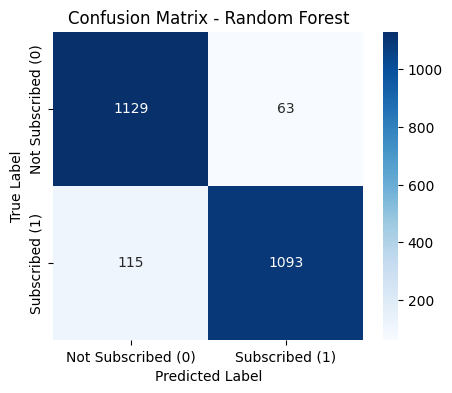

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Initialize & Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Classification Reports
print("\nRandom Forest Model\n")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_rf))

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Subscribed (0)', 'Subscribed (1)'],
            yticklabels=['Not Subscribed (0)', 'Subscribed (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()



--- Feature Importance from Random Forest ---


/tmp/ipython-input-463723054.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


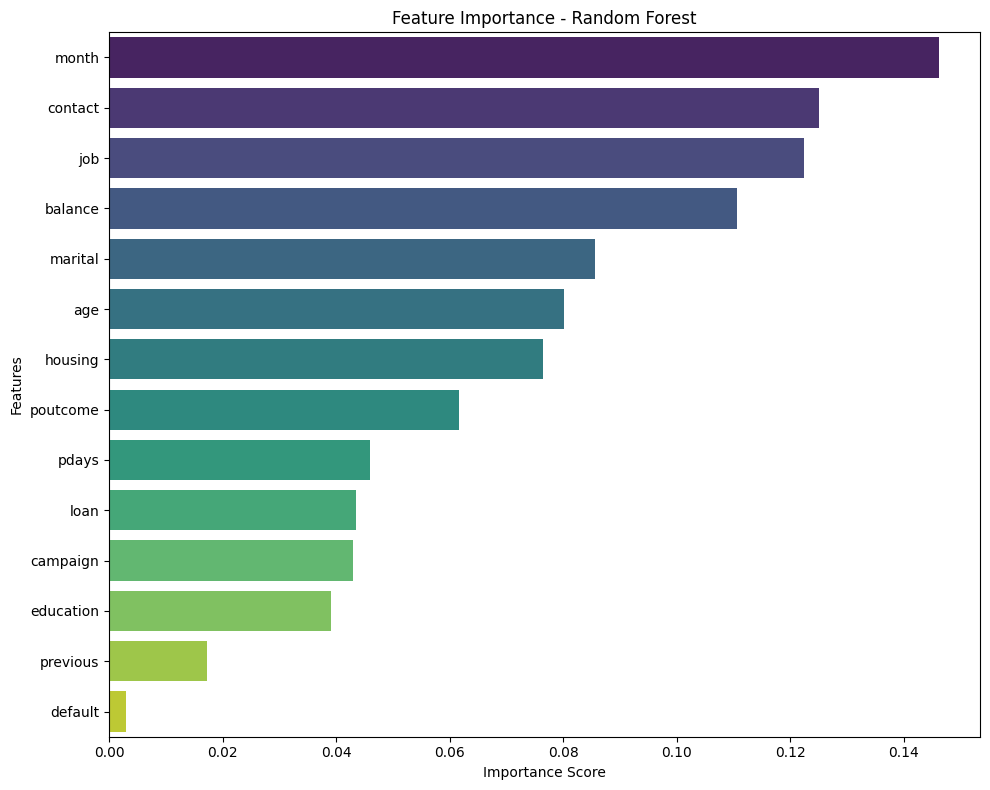

In [64]:
# Display Feature Importance
print("\n--- Feature Importance from Random Forest ---")
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Random Forest using Hyperparameter GridSearchCV

In [65]:
# Random Forest using Hyperparameter GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest params:", grid_rf.best_params_)
print("Best Random Forest score:", grid_rf.best_score_)

Best Random Forest params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
Best Random Forest score: 0.9217857142857142


In [66]:
# Appliying best parameter from GridSearchCV to Decision Tree Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest using Hyperparameter Tuning GridSearchCV\n")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_rf))


# Evaluate the Model (on Test Set) using GridSearchCV
print("\nEvaluation Results (Test Set)")
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")


Random Forest using Hyperparameter Tuning GridSearchCV


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2808
           1       0.99      0.96      0.98      2792

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1192
           1       0.95      0.90      0.92      1208

    accuracy                           0.92      2400
   macro avg       0.93      0.92      0.92      2400
weighted avg       0.93      0.92      0.92      2400


Evaluation Results (Test Set)
Accuracy: 0.9246
Precision: 0.9454
Recall: 0.9023
F1-Score: 0.9233



# Gradient Boosting

--- Starting Gradient Boosting Model Training ---
Gradient Boosting training completed.


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2808
           1       0.99      0.96      0.98      2792

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1192
           1       0.95      0.88      0.92      1208

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400

--- Gradient Boosting Evaluation Results ---
Accuracy: 0.9196
Precision: 0.9519
Recall: 0.8849
F1-Score: 0.9172



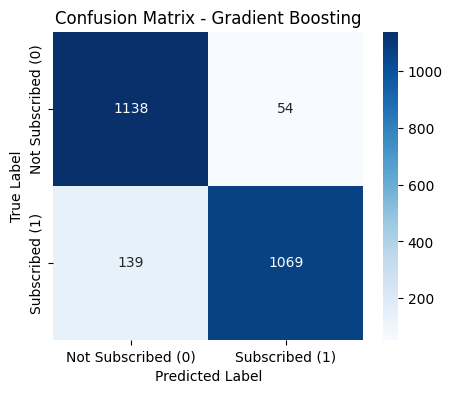

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

print("--- Starting Gradient Boosting Model Training ---")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
print("Gradient Boosting training completed.\n")

y_pred_gb = gb_model.predict(X_test)

# Classification Reports
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_gb))

# Model Evaluation
print("--- Gradient Boosting Evaluation Results ---")
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Subscribed (0)', 'Subscribed (1)'],
            yticklabels=['Not Subscribed (0)', 'Subscribed (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


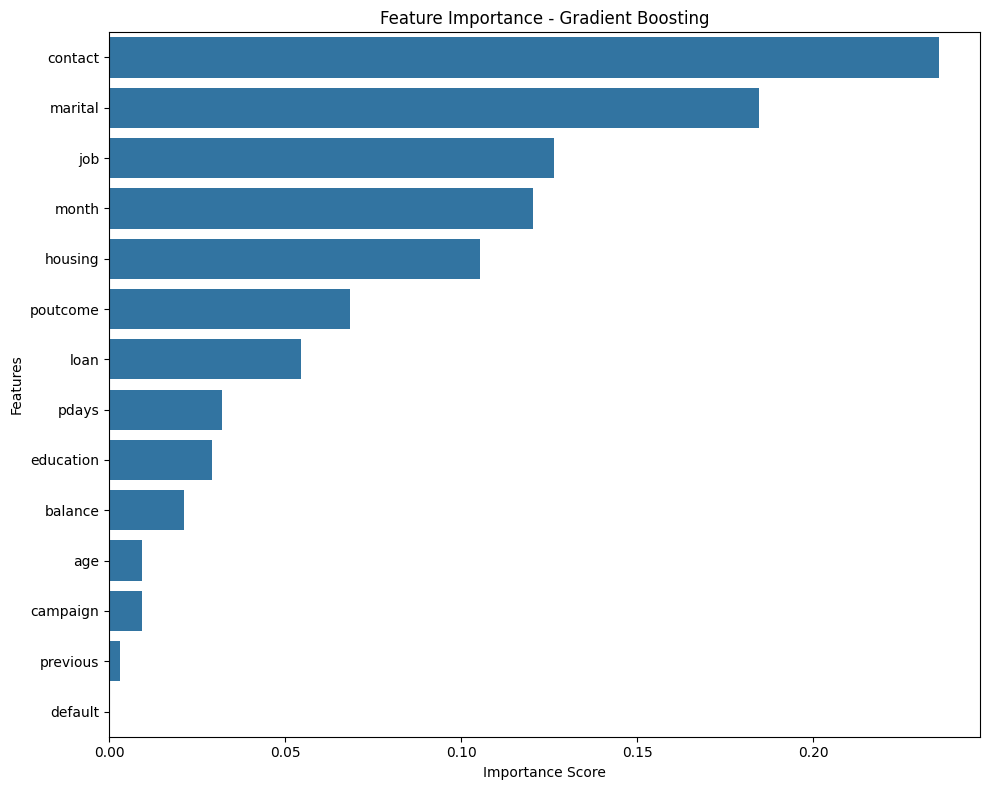

In [68]:
# Display Feature Importance
feature_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Gradient Boosting using Hyperparameter Tuning GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42)

# Define the Parameter Grid
param_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Perform GridSearchCV
grid_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_gb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("--- Starting Grid Search for Gradient Boosting ---")
grid_gb.fit(X_train, y_train)
print("--- Grid Search Completed ---\n")

# Display Best Parameters and Best Score
print("Best Gradient Boosting Parameters:", grid_gb.best_params_)
print("Best Cross-Validation Score:", grid_gb.best_score_)



--- Starting Grid Search for Gradient Boosting ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
--- Grid Search Completed ---

Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best Cross-Validation Score: 0.9371428571428572



--- Evaluation on Test Data ---
Test Accuracy: 0.9358333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1192
           1       0.97      0.90      0.93      1208

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400

--- Gradient Boosting Evaluation Results using Hyperparameter ---
Accuracy: 0.9358
Precision: 0.9722
Recall: 0.8982
F1-Score: 0.9337



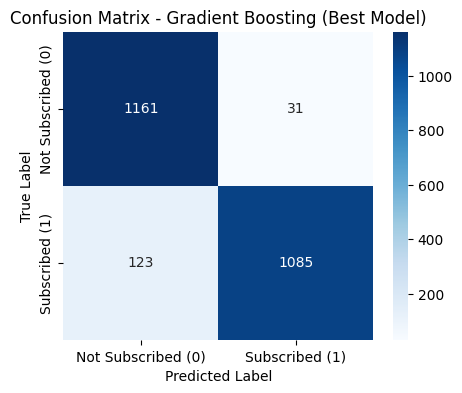

In [70]:
# Evaluate Best Model on Test Set
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

print("\n--- Evaluation on Test Data ---")
print("Test Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Model Evaluation
print("--- Gradient Boosting Evaluation Results using Hyperparameter ---")
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

# --- 6. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Subscribed (0)', 'Subscribed (1)'],
            yticklabels=['Not Subscribed (0)', 'Subscribed (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting (Best Model)')
plt.show()

# Evaluate each Model


=== Confusion Matrix: Decision Tree ===


/tmp/ipython-input-3621691967.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([metrics])], ignore_index=True)


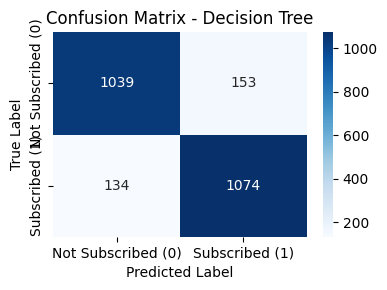


=== Confusion Matrix: Random Forest ===


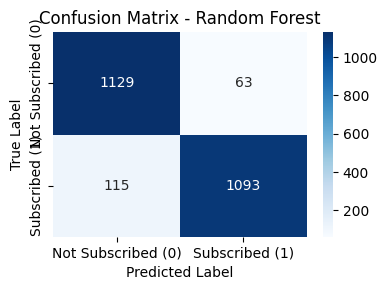


=== Confusion Matrix: Gradient Boosting ===


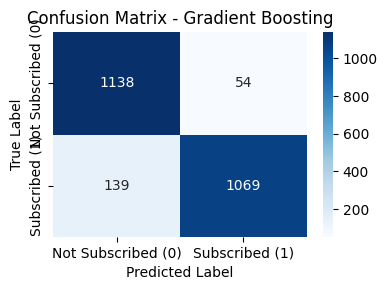

In [71]:
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

results = pd.DataFrame(columns=["Model",
                                "Accuracy (Train)", "Precision (Train)", "Recall (Train)", "F1-score (Train)",
                                "Accuracy (Test)", "Precision (Test)", "Recall (Test)", "F1-score (Test)"])

for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)


    metrics = {
        "Model": name,
        "Accuracy (Train)": accuracy_score(y_train, y_pred_train),
        "Precision (Train)": precision_score(y_train, y_pred_train),
        "Recall (Train)": recall_score(y_train, y_pred_train),
        "F1-score (Train)": f1_score(y_train, y_pred_train),
        "Accuracy (Test)": accuracy_score(y_test, y_pred_test),
        "Precision (Test)": precision_score(y_test, y_pred_test),
        "Recall (Test)": recall_score(y_test, y_pred_test),
        "F1-score (Test)": f1_score(y_test, y_pred_test)
    }

    results = pd.concat([results, pd.DataFrame([metrics])], ignore_index=True)

    # Confusion Matrix
    print(f"\n=== Confusion Matrix: {name} ===")
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Subscribed (0)', 'Subscribed (1)'],
                yticklabels=['Not Subscribed (0)', 'Subscribed (1)'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

,Accuracy (Train),Precision (Train),Recall (Train),F1-score (Train),Accuracy (Test),Precision (Test),Recall (Test),F1-score (Test)
Model,,,,,,,,
Decision Tree,0.9998,1.0000,0.9996,0.9998,0.8804,0.8753,0.8891,0.8821
Random Forest,0.9998,1.0000,0.9996,0.9998,0.9258,0.9455,0.9048,0.9247
Gradient Boosting,0.9252,0.9619,0.8850,0.9218,0.9196,0.9519,0.8849,0.9172


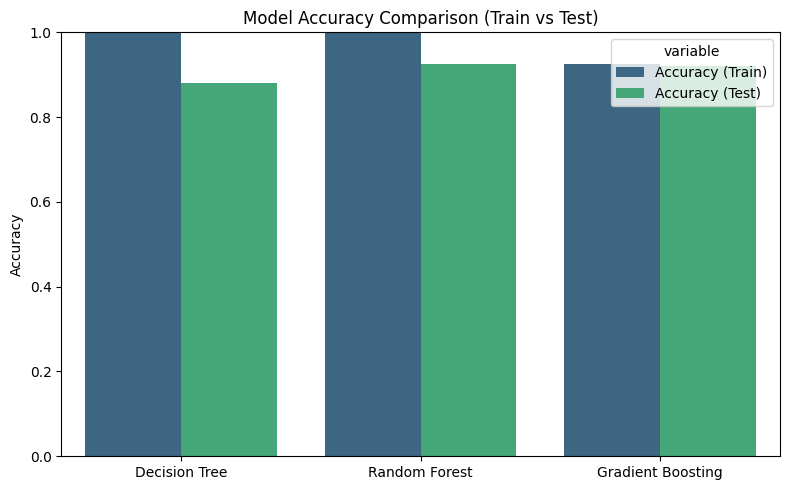

In [72]:
# Showing the Model Comparison Table
results.set_index("Model", inplace=True)
display(results.round(4))

plt.figure(figsize=(8, 5))
sns.barplot(data=results.reset_index().melt(id_vars='Model', value_vars=['Accuracy (Train)', 'Accuracy (Test)']),
            x='Model', y='value', hue='variable', palette='viridis')
plt.title("Model Accuracy Comparison (Train vs Test)")
plt.ylabel("Accuracy")
plt.xlabel("")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Discussion & Insight

**1. Which model performed best overall?**
Based on the model evaluation results, Gradient Boosting, after tuning, demonstrated the best overall performance.

This model achieved an accuracy of 0.9358, a precision of 0.9722, a recall of 0.8982, and an F1 score of 0.9337—the highest scores among all tested models.

This indicates that Gradient Boosting has excellent capabilities in:
- Identifying customers who will truly respond to marketing campaigns (high recall)
- Minimizing prediction errors for uninterested customers (high precision)
- Maintaining a balance between precision and recall (high F1 score)

Thus, Gradient Boosting (after hyperparameter tuning) is the most optimal model for predicting the success of bank marketing campaigns.

**2. Did ensemble methods (RF, Gradient Boosting) improve performance compared to a single Decision Tree?**

Yes, ensemble methods have been shown to improve performance compared to single Decision Tree models.

**3. How could the bank use these insights to refine its marketing strategy?**

Based on the model results and their interpretation, banks can derive several more effective business strategies:
- More precise customer segmentation:
With the best model (Gradient Boosting), banks can identify customers with a high probability of responding to campaigns. This allows banks to target promotions only to the most potential groups, thereby saving marketing costs and increasing conversion rates.
- Resource optimization:
By understanding the most influential features (feature importance), banks can focus on key factors such as age, balance, employment status, and previous campaign history.
For example, if the model indicates that customers with high balances and a positive history with previous campaigns are more likely to purchase deposit products, campaigns can be directed more specifically to this segment.
- Continuous campaign evaluation:
Models can be used as a decision support system tool to evaluate the effectiveness of subsequent campaigns. Each time a new campaign is launched, the model's predictions can be compared with actual results to iteratively improve marketing strategies.
- Increased customer satisfaction:
With more relevant and personalized promotions based on model predictions, customers feel more valued and are less annoyed by campaigns that don't match their interests.